In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
T_data=pd.read_csv('C:/Users/Pradeep Mishra/Desktop/twitter_training.csv')
T_data.head(10)

,id,game_titles,sentiments,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [9]:
V_data=pd.read_csv('C:/Users/Pradeep Mishra/Desktop/twitter_Validation.csv')
V_data.head(10)

,id,game_titles,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâ€™ve had Madeleine McCann in my c...
6,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
7,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
8,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
9,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...


In [10]:
T_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           74682 non-null  int64 
 1   game_titles  74682 non-null  object
 2   sentiments   74682 non-null  object
 3   text         73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
T_data.describe()

,id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [12]:
T_data.isna().sum()

id               0
game_titles      0
sentiments       0
text           686
dtype: int64

In [17]:
T_data['game_titles'].value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [18]:
T_data=T_data.dropna()

In [19]:
T_data.isna().sum()

id             0
game_titles    0
sentiments     0
text           0
dtype: int64

## 2. EDA

In [20]:
T_data.head(4)

,id,game_titles,sentiments,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...


In [21]:
T_data['sentiments'].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: sentiments, dtype: int64

In [22]:
T_data.shape

(73996, 4)

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
T_data['sentiments']=encoder.fit_transform(T_data['sentiments'])
T_data['sentiments']

0        3
1        3
2        3
3        3
4        3
        ..
74677    3
74678    3
74679    3
74680    3
74681    3
Name: sentiments, Length: 73996, dtype: int32

### Here,
* Negative      22358  -    1
* Positive      20655  -    3
* Neutral       18108  -    2
* Irrelevant    12875  -    0

In [24]:
T_data['sentiments'].value_counts()

1    22358
3    20655
2    18108
0    12875
Name: sentiments, dtype: int64

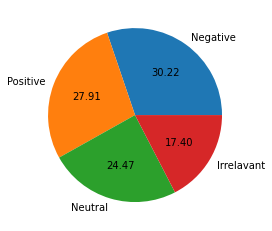

In [25]:
import matplotlib.pyplot as plt
plt.pie(T_data['sentiments'].value_counts(),labels=['Negative','Positive','Neutral','Irrelavant'],autopct="%0.2f")
plt.show()

In [26]:
import nltk
!pip install nltk
nltk.download('punkt')


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Pradeep Mishra\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [27]:
T_data['num_characters']=T_data['text'].apply(len)

In [28]:
T_data.head()

,id,game_titles,sentiments,text,num_characters
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,57


In [29]:
#num of words
T_data['num_words']=T_data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
T_data['num_sentences']=T_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
T_data.head()

,id,game_titles,sentiments,text,num_characters,num_words,num_sentences
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,53,11,1
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,51,13,1
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,50,11,1
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,51,11,1
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,57,13,1


In [31]:
T_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,73996.000000,73996.000000,73996.000000
mean,108.783475,22.590221,1.943929
std,79.524447,17.158121,1.632746
min,1.000000,0.000000,0.000000
25%,47.000000,10.000000,1.000000
50%,91.000000,18.000000,1.000000
75%,153.000000,32.000000,2.000000
max,957.000000,198.000000,33.000000


In [32]:
#Negative
T_data[T_data['sentiments']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,22358.000000,22358.000000,22358.000000
mean,111.285625,23.282315,1.814518
std,81.850419,17.395162,1.361747
min,1.000000,0.000000,0.000000
25%,46.000000,10.000000,1.000000
50%,91.000000,19.000000,1.000000
75%,161.000000,33.000000,2.000000
max,727.000000,198.000000,22.000000


In [33]:
#Postive
T_data[T_data['sentiments']==2][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,18108.000000,18108.000000,18108.000000
mean,118.834272,24.025569,2.106528
std,77.419856,17.047540,1.887800
min,1.000000,0.000000,0.000000
25%,62.000000,12.000000,1.000000
50%,105.000000,20.000000,1.000000
75%,161.000000,33.000000,3.000000
max,957.000000,198.000000,31.000000


In [34]:
#Neutral
T_data[T_data['sentiments']==3][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20655.000000,20655.000000,20655.000000
mean,95.926071,20.267151,1.892520
std,77.385147,16.770681,1.585334
min,1.000000,0.000000,0.000000
25%,36.000000,8.000000,1.000000
50%,74.000000,16.000000,1.000000
75%,134.000000,28.000000,2.000000
max,692.000000,198.000000,33.000000


In [35]:
#Irrelavant
T_data[T_data['sentiments']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,12875.000000,12875.000000,12875.000000
mean,110.929243,23.096466,2.022447
std,79.082719,17.146750,1.726537
min,1.000000,0.000000,0.000000
25%,50.000000,10.000000,1.000000
50%,93.000000,19.000000,1.000000
75%,154.000000,32.000000,2.000000
max,692.000000,198.000000,25.000000


In [36]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

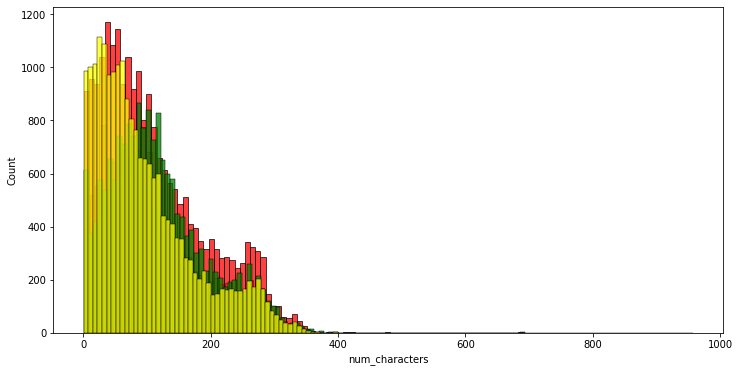

In [37]:
#0-irrelevant | 1- Negative | 2- Positive |3- Neutral

plt.figure(figsize=(12,6))
sns.histplot(T_data[T_data['sentiments']==0]['num_characters'],color='gray')
sns.histplot(T_data[T_data['sentiments']==1]['num_characters'],color='red')
sns.histplot(T_data[T_data['sentiments']==2]['num_characters'],color='green')
sns.histplot(T_data[T_data['sentiments']==3]['num_characters'],color='yellow')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

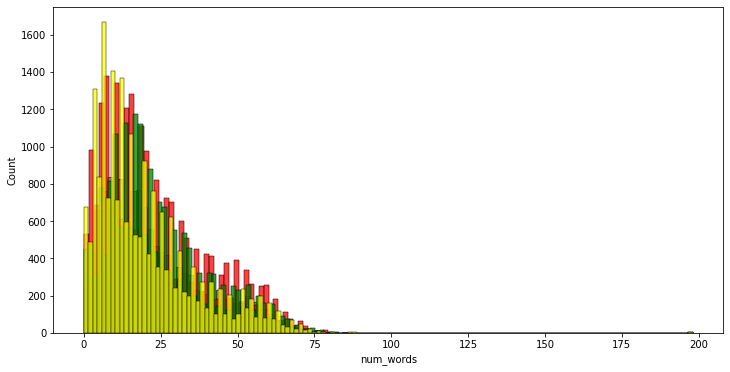

In [38]:
#0-irrelevant | 1- Negative | 2- Positive |3- Neutral

plt.figure(figsize=(12,6))
sns.histplot(T_data[T_data['sentiments']==0]['num_words'],color='gray')
sns.histplot(T_data[T_data['sentiments']==1]['num_words'],color='red')
sns.histplot(T_data[T_data['sentiments']==2]['num_words'],color='green')
sns.histplot(T_data[T_data['sentiments']==3]['num_words'],color='yellow')

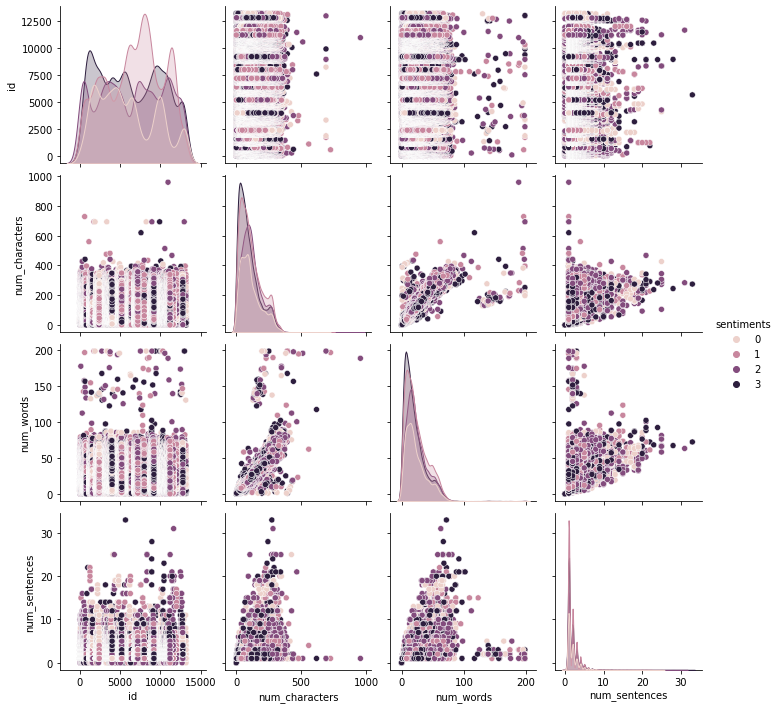

In [39]:
sns.pairplot(T_data,hue='sentiments')

<AxesSubplot:>

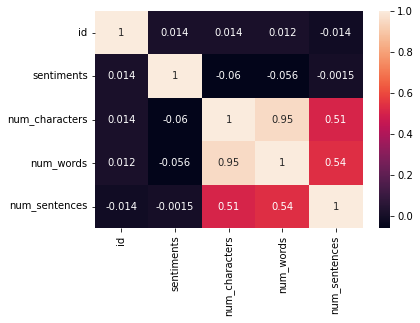

In [40]:
sns.heatmap(T_data.corr(),annot=True)

## 3. Data preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing drop words and puctuation
* Stemming

In [41]:
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
import string

[nltk_data] Downloading package stopwords to C:\Users\Pradeep
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
import string
from nltk.corpus import stopwords
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [43]:
transform_text(T_data['text'][1])

'come border kill'

In [44]:
T_data['transform_text']=T_data['text'].apply(transform_text)

In [45]:
from wordcloud import WordCloud
wc= WordCloud(width=500, height=500, min_font_size=10, background_color='white')

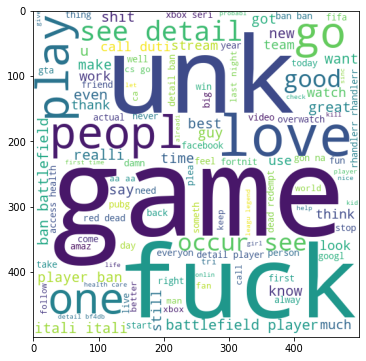

In [46]:
Irrelavant_wc= wc.generate(T_data[T_data['sentiments']== 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(Irrelavant_wc)

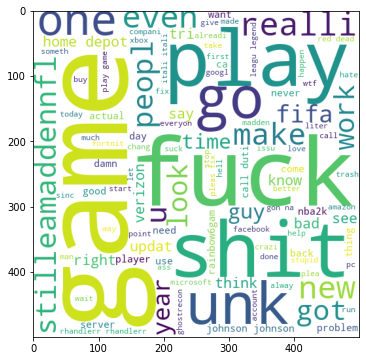

In [47]:
Negative_wc= wc.generate(T_data[T_data['sentiments']== 1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(Negative_wc)

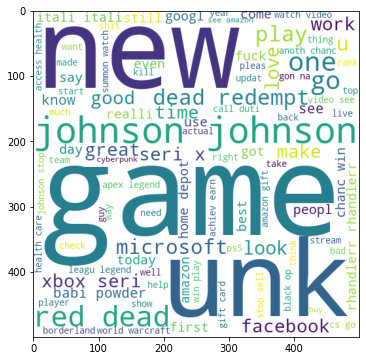

In [48]:
Postive_wc= wc.generate(T_data[T_data['sentiments']== 2]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(Postive_wc)

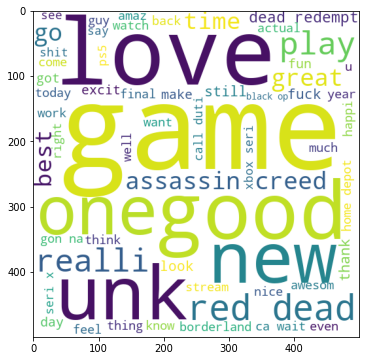

In [49]:
Neutral_wc= wc.generate(T_data[T_data['sentiments']== 3]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(Neutral_wc)

In [50]:
T_data.head()

,id,game_titles,sentiments,text,num_characters,num_words,num_sentences,transform_text
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,53,11,1,im get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,51,13,1,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,50,11,1,im get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,51,11,1,im come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,57,13,1,im get borderland 2 murder


In [51]:
#0-irrelevant | 1- Negative | 2- Positive |3- Neutral

irr_corpus=[]
for msg in T_data[T_data['sentiments']==0]['transform_text'].tolist():
    for word in msg.split():
        irr_corpus.append(word)

In [52]:
neg_corpus=[]
for msg in T_data[T_data['sentiments']==1]['transform_text'].tolist():
    for word in msg.split():
        neg_corpus.append(word)

In [53]:
pos_corpus=[]
for msg in T_data[T_data['sentiments']==2]['transform_text'].tolist():
    for word in msg.split():
        pos_corpus.append(word)

In [54]:
neu_corpus=[]
for msg in T_data[T_data['sentiments']==0]['transform_text'].tolist():
    for word in msg.split():
        neu_corpus.append(word)

In [55]:
T_data.head()

,id,game_titles,sentiments,text,num_characters,num_words,num_sentences,transform_text
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,53,11,1,im get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,51,13,1,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,50,11,1,im get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,51,11,1,im come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,57,13,1,im get borderland 2 murder


## 4. Model Building

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [57]:
X= tfidf.fit_transform(T_data['transform_text']).toarray() 

In [58]:
#from sklearn.preprocessing import MinMaxScaler
#scaler= MinMaxScaler()
#X= scaler.fit_transform(X)

In [59]:
X.shape


(73996, 3000)

In [60]:
y=T_data['sentiments'].values
y

array([3, 3, 3, ..., 3, 3, 3])

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)


In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

In [63]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

In [64]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [65]:
from sklearn.metrics import *
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='weighted'))

0.4135810810810811
[[2316   62   45  119]
 [2088 1515  250  607]
 [1867  291  893  580]
 [2433  174  163 1397]]
0.5769631024221151


In [66]:
from sklearn.metrics import *
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='weighted'))

0.6127702702702703
[[ 803  706  311  722]
 [ 120 3418  424  498]
 [ 178  811 1883  759]
 [ 125  693  384 2965]]
0.6182538336631044


In [67]:
from sklearn.metrics import *
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='weighted'))

0.6061486486486487
[[1147  356  245  794]
 [ 308 2890  455  807]
 [ 363  496 1745 1027]
 [ 212  401  365 3189]]
0.6139657894111277


In [68]:
#Model improve
#1. change the 
T_data.head()

,id,game_titles,sentiments,text,num_characters,num_words,num_sentences,transform_text
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,53,11,1,im get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,51,13,1,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,50,11,1,im get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,51,11,1,im come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,57,13,1,im get borderland 2 murder


In [69]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
